In [1]:
import pandas as pd
df = pd.read_csv('FinalHW.csv')
# you need to predict average prices of Avocados in US
# every column might contain important info, its up to you to deal with it
# you MUST use a neural network and test other algorithms such as XGboost, RF or gradientBoosting Regressor etc..
# good luck
# until 19th of December
# data set name is FinalHW. csv
# predict AveragePrice

In [2]:
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.region.unique() 

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [4]:
df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
TotalVolume     0
4046            0
4225            0
4770            0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_data = df.drop(['type','region','Date'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x_data, df.type, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2').fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9357643963753288
0.9294169224024551


/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[2274    7]
 [  13 2268]]
              precision    recall  f1-score   support

conventional       0.99      1.00      1.00      2281
     organic       1.00      0.99      1.00      2281

    accuracy                           1.00      4562
   macro avg       1.00      1.00      1.00      4562
weighted avg       1.00      1.00      1.00      4562



In [8]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[2246   35]
 [  35 2246]]
              precision    recall  f1-score   support

conventional       0.98      0.98      0.98      2281
     organic       0.98      0.98      0.98      2281

    accuracy                           0.98      4562
   macro avg       0.98      0.98      0.98      4562
weighted avg       0.98      0.98      0.98      4562



In [9]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
KN_pred = KN.predict(X_test)
print(confusion_matrix(y_test, KN_pred))
print(classification_report(y_test, KN_pred))

[[2240   41]
 [  65 2216]]
              precision    recall  f1-score   support

conventional       0.97      0.98      0.98      2281
     organic       0.98      0.97      0.98      2281

    accuracy                           0.98      4562
   macro avg       0.98      0.98      0.98      4562
weighted avg       0.98      0.98      0.98      4562



In [10]:
print(df.AveragePrice.describe(percentiles = [0.25,0.50,0.85,1]))

count    18246.000000
mean         1.405967
std          0.402662
min          0.440000
25%          1.100000
50%          1.370000
85%          1.830000
100%         3.250000
max          3.250000
Name: AveragePrice, dtype: float64


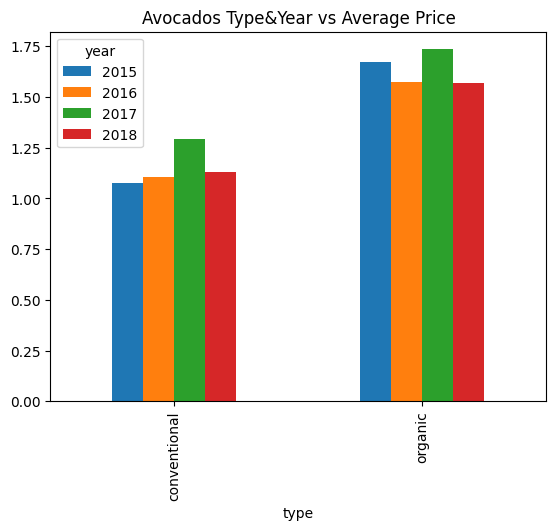

In [11]:
import matplotlib.pyplot as plt

df2 = pd.DataFrame(df.groupby(['type','year'])['AveragePrice'].mean().unstack(fill_value=0))
df2.plot.bar()
plt.title('Avocados Type&Year vs Average Price')
plt.show()

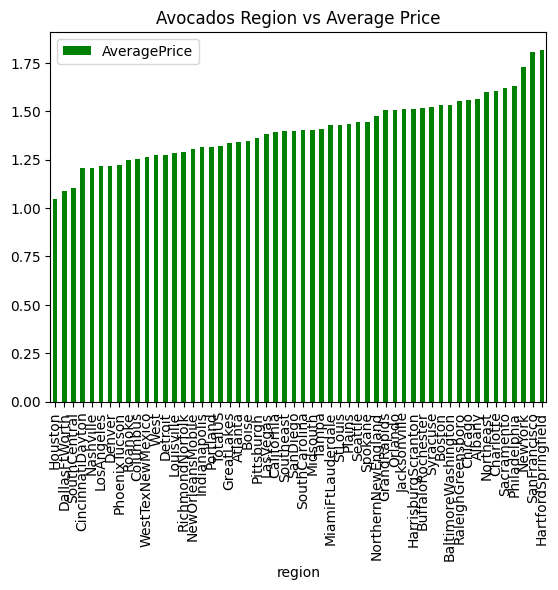

In [12]:
df3 = pd.DataFrame(df.groupby(['region'])['AveragePrice'].mean().sort_values(ascending = True))
df3.plot.bar(color="green")
plt.title('Avocados Region vs Average Price')
plt.show()

/tmp/ipykernel_3362/2398855212.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AveragePrice"], color = 'orange')


<AxesSubplot: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

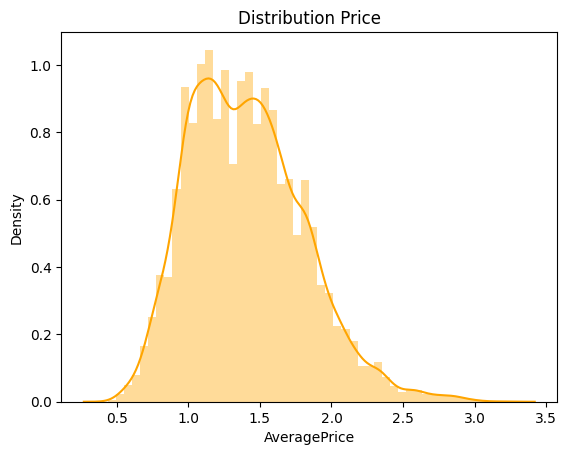

In [13]:
import seaborn as sns

plt.title("Distribution Price")
sns.distplot(df["AveragePrice"], color = 'orange')

In [14]:
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
import numpy as np

df['type'] = np.where(df['type']=="conventional", 0, 1)
df.head(10)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,0,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,0,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,0,2015,Albany


In [16]:
from typing import Sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(7, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
epochs = 400
batch_size = 128
verbose = 1



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, verbose=verbose, mode='auto')
callbacks_list = [earlystop]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_early_heart=model.fit(X_train, y_train, validation_split=0.35, epochs=epochs, batch_size=batch_size)

x = X_test.df.to_numpy()
result = model.predict(
    x,
    batch_size=batch_size,
    verbose=verbose,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

result_with_batch = model.predict_on_batch(x)

SEQ_score = model_without_early_heart.history.get("val_accuracy")[epochs-1]

2022-12-09 08:50:04.881604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 08:50:05.028169: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-09 08:50:05.032872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 08:50:05.032892: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Epoch 1/400


2022-12-09 08:50:06.719319: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-09 08:50:06.719361: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-09 08:50:06.719376: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ybor): /proc/driver/nvidia/version does not exist
2022-12-09 08:50:06.720190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/l

ValueError: in user code:

    File "/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 11)
